# Использование обученной модели:

In [348]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/home/bogdan/converted_keras/keras_model.h5", compile=False)

# Load the labels
class_names = open("/home/bogdan/converted_keras/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/home/bogdan/fruits/test-fruit2.png").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
#image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image = ImageOps.fit(image, size, method=Image.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the imag
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 0s 482ms/step
Class: Strawberry
Confidence Score: 0.9999738


Создание простой нейронной сети прямого распространения

# Простая многослойная нейронная сеть

Подключение библиотеки, загрузка датасета и нормализация его значений:

In [89]:
import keras 
from keras.datasets import mnist
from keras.utils import np_utils 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import adam
import matplotlib.pyplot as plt
import numpy as np


#загружается датасет mnist, содержащий изображения рукописных цифр от 0 до 9
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]).astype('float32')
X_train/=255
X_test/=255
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes) 

Формирование архитектуры сети:

In [90]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))

Обучение и тестирование:

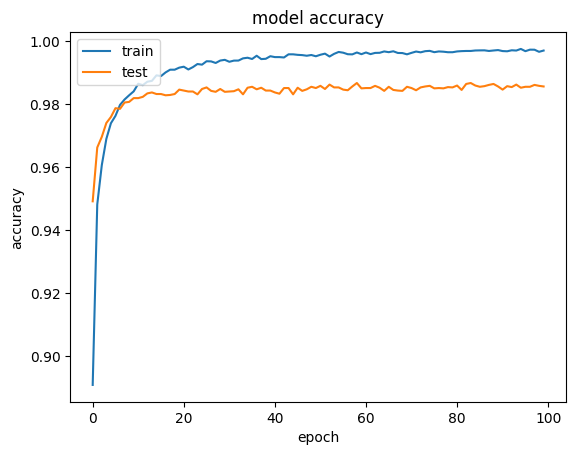


# Оцениваем на тестовых данных
79/79 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9857
test loss, test acc: [0.08620293438434601, 0.9857000112533569]


In [91]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n# Оцениваем на тестовых данных')
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)

___

## Дополнительное задание №1

Напишем несколько вспомогательных функций для считывания изображений из директории предсказаний, тестирования и вывода:

In [328]:
from pathlib import Path
from PIL import Image

def images2arr(path) -> list:
    """
    Функция считывающая все картинки из директории path, 
    reshape'ит их и складывает в lst.
    """
    lst: list = []
    directory_content: list = list(map(str, sorted(Path(path).iterdir())))
    for image_path in directory_content:
        img = np.invert(Image.open(image_path).resize((28,28)).convert('L')).ravel()
        im2arr = img.reshape(1, 28* 28).astype('float32')/255
        lst.append(im2arr)
    return lst

def model_predict(model, lst) -> list:
    """Функция для предсказаний модели."""
    result: list = []
    for arr_img in lst:
        result.append(model.predict(arr_img))
    return result

def test(models, show_array=False) -> list:
    """Функция тестирующая предсказания"""
    true_predict: list = []
    for i in range(len(models)):  
        true_predict.append(i == np.argmax(models[i]))
        if show_array:
            print(models[i])
        print(np.argmax(models[i]), true_predict[i])
    return true_predict

Использование обученной модели с **512 нейронами**.

In [340]:
img_list = images2arr('/home/bogdan/numbers/')

models1 = model_predict(model, img_list)

tests1 = test(models1, show_array=True)

result1 = (sum(tests1) / 10) * 100

print(f'Result: {result1}%')

1/1 [==============================] - 0s 13ms/step
[[0.87833685 0.00003574 0.00003571 0.         0.00000669 0.00147703
  0.11557941 0.00441662 0.00009867 0.00001326]]
0 True
[[0.00002043 0.01602244 0.00002922 0.00000011 0.7251749  0.19571061
  0.00021802 0.0566086  0.00621427 0.0000014 ]]
4 False
[[0.00000012 0.         0.9502788  0.00000218 0.00002125 0.
  0.04969767 0.         0.         0.        ]]
2 True
[[0.         0.00009898 0.9972299  0.00113263 0.         0.00001312
  0.00000472 0.00000007 0.0015206  0.00000003]]
2 False
[[0.         0.00388307 0.00000023 0.00000166 0.85441506 0.00197963
  0.         0.12952876 0.00067525 0.00951631]]
4 True
[[0.         0.         0.         0.         0.         0.99993587
  0.         0.         0.00006403 0.0000001 ]]
5 True
[[0.00000002 0.         0.00000304 0.         0.00000002 0.00073157
  0.99910897 0.         0.00015649 0.        ]]
6 True
[[0.         0.00000039 0.00024527 0.00898033 0.         0.00000009
  0.         0.99077386 0

Сохранение обученной модели:

In [55]:
model.save('model.h5') 

___

## Дополнительное задание №2

1. Анализ изменения количества **нейронов до 128**.

In [10]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(128, input_dim=(X_train.shape[1]), activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(number_of_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=0)

print('\n# Оцениваем на тестовых данных')
results = model2.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)


# Оцениваем на тестовых данных
79/79 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9794
test loss, test acc: [0.10400495678186417, 0.9793999791145325]


Тест:

In [341]:
models2 = model_predict(model2, img_list)

tests2 = test(models2)

result2 = (sum(tests2) / 10) * 100

print(f'Result: {result2}%')

1/1 [==============================] - 0s 15ms/step
6 False
8 False
6 False
2 False
7 False
5 True
6 True
1 False
4 False
8 False
Result: 20.0%


2. Анализ изменения количества **нейронов до 1024**.

In [12]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Dense(1024, input_dim=(X_train.shape[1]), activation='relu'))
model3.add(keras.layers.Dropout(0.5))
model3.add(keras.layers.Dense(number_of_classes, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=0)

print('\n# Оцениваем на тестовых данных')
results = model3.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)


# Оцениваем на тестовых данных
79/79 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9859
test loss, test acc: [0.10573411732912064, 0.9858999848365784]


Тест:

In [342]:
models3 = model_predict(model3, img_list)

tests3 = test(models3)

result3 = (sum(tests3) / 10) * 100

print(f'Result: {result3}%')

1/1 [==============================] - 0s 13ms/step
0 True
1 True
2 True
2 False
4 True
5 True
6 True
7 True
9 False
8 False
Result: 70.0%


3. Добавляем один слой (128 + 512)

In [14]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Dense(128, input_dim=(X_train.shape[1]), activation='relu'))
model4.add(Dense(512, activation='relu'))
model4.add(keras.layers.Dropout(0.5))
model4.add(keras.layers.Dense(number_of_classes, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=0)

print('\n# Оцениваем на тестовых данных')
results = model4.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)


# Оцениваем на тестовых данных
79/79 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9811
test loss, test acc: [0.19485755264759064, 0.9811000227928162]


Тест:

In [343]:
models4 = model_predict(model4, img_list)

tests4 = test(models4)

result4 = (sum(tests4) / 10) * 100

print(f'Result: {result4}%')

1/1 [==============================] - 0s 14ms/step
0 True
4 False
2 True
2 False
4 True
8 False
8 False
7 True
4 False
8 False
Result: 40.0%


4. Добавляем два слоя (128 + 512 + 1024)

In [16]:
model5 = keras.models.Sequential()
model5.add(keras.layers.Dense(128, input_dim=(X_train.shape[1]), activation='relu'))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(1024, activation='relu'))
model5.add(keras.layers.Dropout(0.5))
model5.add(keras.layers.Dense(number_of_classes, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=0)

print('\n# Оцениваем на тестовых данных')
results = model5.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)


# Оцениваем на тестовых данных
79/79 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9816
test loss, test acc: [0.22075888514518738, 0.9815999865531921]


Тест:

In [344]:
models5 = model_predict(model5, img_list)

tests5 = test(models5)

result5 = (sum(tests5) / 10) * 100

print(f'Result: {result5}%')

1/1 [==============================] - 0s 12ms/step
0 True
2 False
2 True
2 False
8 False
5 True
8 False
7 True
8 True
8 False
Result: 50.0%


5. Добавляем три слоя (128 + 512 + 1024 + 2048)

In [18]:
model6 = keras.models.Sequential()
model6.add(keras.layers.Dense(128, input_dim=(X_train.shape[1]), activation='relu'))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(1024, activation='relu'))
model6.add(Dense(2048, activation='relu'))
model6.add(keras.layers.Dropout(0.5))
model6.add(keras.layers.Dense(number_of_classes, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
history6 = model6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=0)

print('\n# Оцениваем на тестовых данных')
results = model6.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)


# Оцениваем на тестовых данных
79/79 [==============================] - 1s 6ms/step - loss: 0.2408 - accuracy: 0.9790
test loss, test acc: [0.24077409505844116, 0.9789999723434448]


Тест:

In [345]:
models6 = model_predict(model6, img_list)

tests6 = test(models6)

result6 = (sum(tests6) / 10) * 100

print(f'Result: {result6}%')

1/1 [==============================] - 0s 13ms/step
6 False
8 False
2 True
8 False
4 True
8 False
8 False
7 True
9 False
8 False
Result: 30.0%


## Результаты:

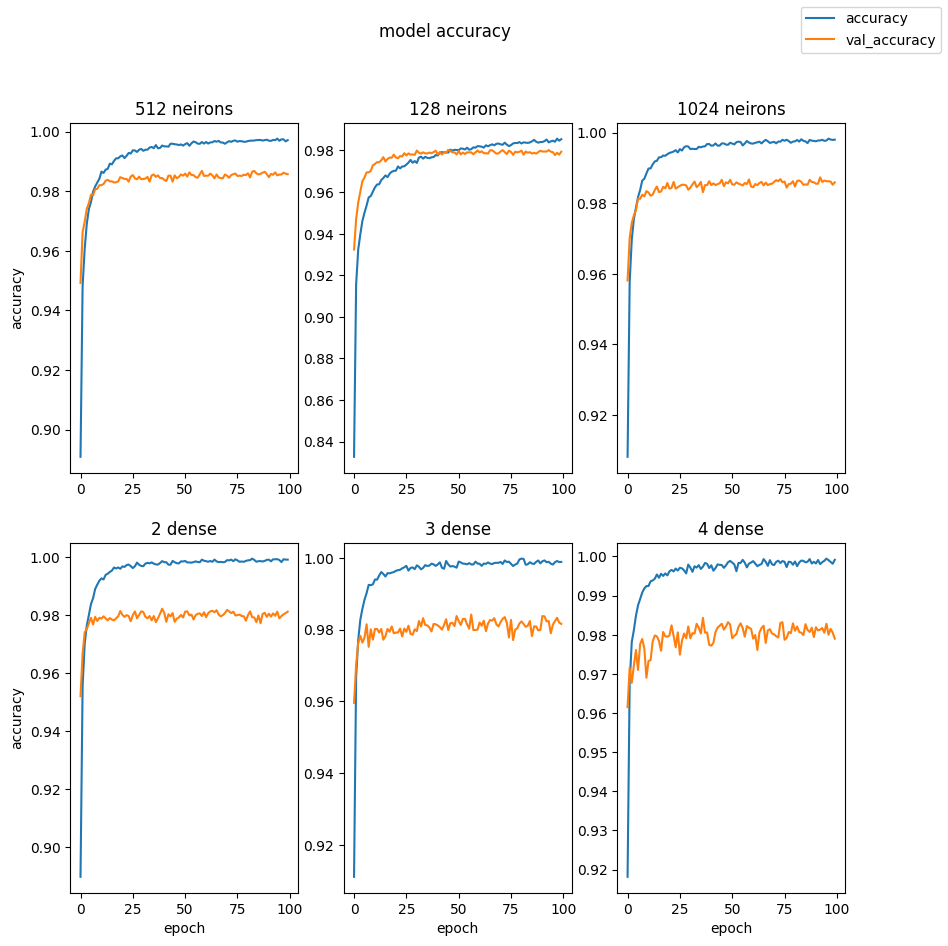

In [151]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

fig.suptitle('model accuracy')

axs[0, 0].set_title('512 neirons')
axs[0, 0].plot(history.history['accuracy'])
axs[0, 0].plot(history.history['val_accuracy'])
axs[0, 0].set_ylabel('accuracy')

axs[0, 1].set_title('128 neirons')
axs[0, 1].plot(history2.history['accuracy'])
axs[0, 1].plot(history2.history['val_accuracy'])

axs[0, 2].set_title('1024 neirons')
axs[0, 2].plot(history3.history['accuracy'])
axs[0, 2].plot(history3.history['val_accuracy'])

axs[1, 0].set_title('2 dense')
axs[1, 0].plot(history4.history['accuracy'])
axs[1, 0].plot(history4.history['val_accuracy'])
axs[1, 0].set_ylabel('accuracy')
axs[1, 0].set_xlabel('epoch')

axs[1, 1].set_title('3 dense')
axs[1, 1].plot(history5.history['accuracy'])
axs[1, 1].plot(history5.history['val_accuracy'])
axs[1, 1].set_xlabel('epoch')

axs[1, 2].set_title('4 dense')
axs[1, 2].plot(history6.history['accuracy'])
axs[1, 2].plot(history6.history['val_accuracy'])
axs[1, 2].set_xlabel('epoch')

fig.legend(['accuracy', 'val_accuracy'], loc='upper right')

plt.show()

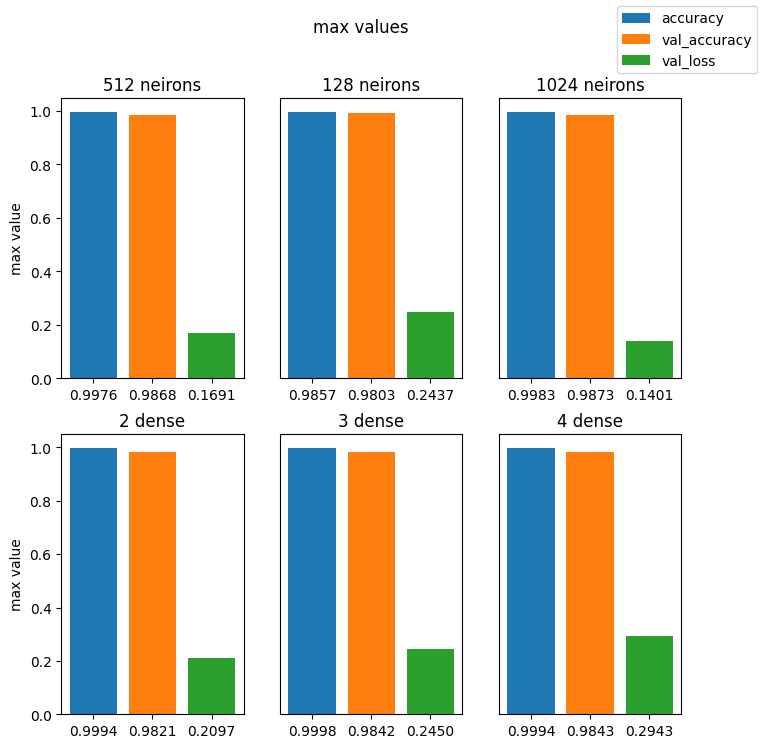

In [150]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))

fig.suptitle('max values')

color = 'white'

axs[0, 0].set_title('512 neirons')
axs[0, 0].bar(x=0, height=max(history.history['accuracy']))
axs[0, 0].bar(x=1, height=max(history.history['val_accuracy']))
axs[0, 0].bar(x=2, height=max(history.history['val_loss']))
axs[0, 0].set_ylabel('max value')
axs[0, 0].set_xticks([0, 1, 2])
axs[0, 0].set_xticklabels(
    map(
        lambda x: f"{x:.{4}f}", 
        [max(history.history['accuracy']), max(history.history['val_accuracy']), max(history.history['val_loss'])]
    )
)

axs[0, 1].set_title('128 neirons')
axs[0, 1].bar(x=0, height=max(history2.history['accuracy']))
axs[0, 1].bar(x=1, height=max(history2.history['val_accuracy']))
axs[0, 1].bar(x=2, height=max(history2.history['val_loss']))
axs[0, 1].set_yticks([])
axs[0, 1].set_xticks([0, 1, 2])
axs[0, 1].set_xticklabels(['accuracy', 'val_accuracy', 'val_loss'])
axs[0, 1].set_xticklabels(
    map(
        lambda x: f"{x:.{4}f}", 
        [max(history2.history['accuracy']), max(history2.history['val_accuracy']), max(history2.history['val_loss'])]
    )
)

axs[0, 2].set_title('1024 neirons')
axs[0, 2].bar(x=0, height=max(history3.history['accuracy']))
axs[0, 2].bar(x=1, height=max(history3.history['val_accuracy']))
axs[0, 2].bar(x=2, height=max(history3.history['val_loss']))
axs[0, 2].set_yticks([])
axs[0, 2].set_xticks([0, 1, 2])
axs[0, 2].set_xticklabels(['accuracy', 'val_accuracy', 'val_loss'])
axs[0, 2].set_xticklabels(
    map(
        lambda x: f"{x:.{4}f}", 
        [max(history3.history['accuracy']), max(history3.history['val_accuracy']), max(history3.history['val_loss'])]
    )
)

axs[1, 0].set_title('2 dense')
axs[1, 0].bar(x=0, height=max(history4.history['accuracy']))
axs[1, 0].bar(x=1, height=max(history4.history['val_accuracy']))
axs[1, 0].bar(x=2, height=max(history4.history['val_loss']))
axs[1, 0].set_ylabel('max value')
axs[1, 0].set_xticks([0, 1, 2])
axs[1, 0].set_xticklabels(['accuracy', 'val_accuracy', 'val_loss'])
axs[1, 0].set_xticklabels(
    map(
        lambda x: f"{x:.{4}f}", 
        [max(history4.history['accuracy']), max(history4.history['val_accuracy']), max(history4.history['val_loss'])]
    )
)

axs[1, 1].set_title('3 dense')
axs[1, 1].bar(x=0, height=max(history5.history['accuracy']))
axs[1, 1].bar(x=1, height=max(history5.history['val_accuracy']))
axs[1, 1].bar(x=2, height=max(history5.history['val_loss']))
axs[1, 1].set_xticks([0, 1, 2])
axs[1, 1].set_xticklabels(['accuracy', 'val_accuracy', 'val_loss'])
axs[1, 1].set_yticks([])
axs[1, 1].set_xticklabels(
    map(
        lambda x: f"{x:.{4}f}", 
        [max(history5.history['accuracy']), max(history5.history['val_accuracy']), max(history5.history['val_loss'])]
    )
)

axs[1, 2].set_title('4 dense')
axs[1, 2].bar(x=0, height=max(history6.history['accuracy']))
axs[1, 2].bar(x=1, height=max(history6.history['val_accuracy']))
axs[1, 2].bar(x=2, height=max(history6.history['val_loss']))
axs[1, 2].set_xticks([0, 1, 2])
axs[1, 2].set_xticklabels(['accuracy', 'val_accuracy', 'val_loss'])
axs[1, 2].set_yticks([])
axs[1, 2].set_xticklabels(
    map(
        lambda x: f"{x:.{4}f}", 
        [max(history6.history['accuracy']), max(history6.history['val_accuracy']), max(history6.history['val_loss'])]
    )
)

fig.legend(['accuracy', 'val_accuracy', 'val_loss'], loc='upper right')

plt.show()

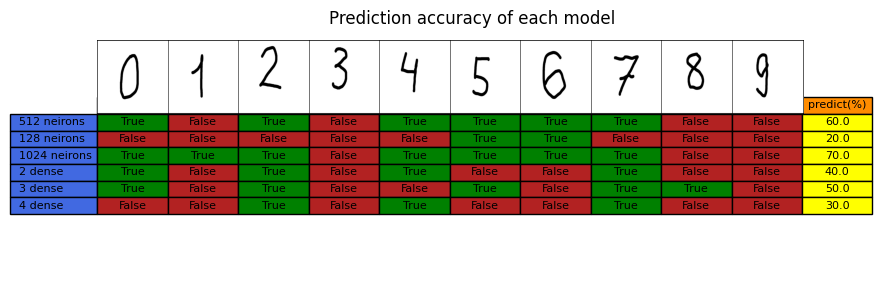

In [347]:
from copy import deepcopy
from IPython.display import display, HTML

fig, ax = plt.subplots()

images = [plt.imread(img_path) for img_path in list(map(str, sorted(Path('/home/bogdan/for_table/').iterdir())))]

fig.suptitle('Prediction accuracy of each model')

fig.set_figheight(3)
fig.set_figwidth(10)

row1 = deepcopy(tests1)
row2 = deepcopy(tests2)
row3 = deepcopy(tests3)
row4 = deepcopy(tests4)
row5 = deepcopy(tests5)
row6 = deepcopy(tests6)

row1.append(result1)
row2.append(result2)
row3.append(result3)
row4.append(result4)
row5.append(result5)
row6.append(result6)


table = ax.table(
    cellText=[
        row1, row2, row3, row4, row5, row6, 
    ], 
    colLabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'predict(%)'],
    rowLabels=['512 neirons', '128 neirons', '1024 neirons', '2 dense', '3 dense', '4 dense'],
    cellLoc='center',
    loc='center',
    rowColours=['royalblue' for _ in range(6)],
    colColours=['darkorange' for _ in range(11)]
)

cells = table.get_celld()
for index, cell in cells.items():
    if index[0] not in (0, -1) and index[1] != -1:
        cell.set_facecolor('green') if cell.get_text().get_text() == 'True' else cell.set_facecolor('firebrick')
    if index[1] == 10 and index[0] != 0:
        cell.set_facecolor('yellow')

for i in range(len(images)):
    ax.imshow(images[i], aspect='auto', extent=[
        -0.055 + (i * 0.01), 
        -0.0449 + (i * 0.01), 
        0.01999999, 
        0.055]
    )
        
ax.axis('tight')
ax.axis('off')

plt.show()